# Basic Feature Discovering for Machine Learning

Cara melakukan langkah-langkah dasar untuk melakukan feature engineering dengan menggunakan Python oleh Andrew Tirto Kusumo

## Pendahuluan

Pengenalan awal dan penggunaan Data set yang digunakan

### Perkenalan Singkat

Perkenalkan saya Andrew, Data Engineer dari JULO, sudah kurang lebih 2 tahun menekuni bidang Data Engineering. Data Engineering sangat menarik untuk saya, Data Engineering adalah bagian dari Data Science yang sangat penting.
Data Engineering masih belum banyak mendapatkan sorotan di Indonesia, tetapi ini adalah salah satu profesi/bidang yang sangat menjanjikan, karena tidak banyak orang yang tahu bagaimana harus menjadi Data Engineer.

Di pembahasan kali ini, saya akan membahas tentang Basic Feature Engineering untuk Modelling. Semoga dapat bermanfaat untuk kita semua.

### Feature Engineering

Feature Engineering adalah proses dimana kita menerapkan pengetahuan yang kita punya untuk mendapatkan informasi yang lebih dari data yang kita punya. Contohnya dari KTP seseorang, anda sebenarnya dapat mendapatkan domisili pembuatan KTP, tanggal lahir, usia, dan jenis kelamin. Anda dapat menggolongkan orang-orang dengan kategori yang sama untuk membuat machine learning lebih mudah membedakan ciri orang.

### Dataset yang digunakan

Di pembahasan kali ini saya menggunakan dataset titanic yang sangat terkenal dan sering digunakan. Dataset ini berasal dari Kaggle, salah satu situs kompetisi machine learning. Dataset ini terdiri dari 2 file, titanic_train.csv dan titanic_test.csv.

Untuk lebih mudah mengenali data ini, kita akan langsung memulai praktek untuk meng-eksplor data dengan Python.

### Import Library yang digunakan

Import library python biasanya dilakukan di awal sebuah projek. Library yang kita akan gunakan antara lain:

- pandas untuk proses dataframe dan csv
- matplotlib untuk plotting grafik
- seaborn untuk plotting grafik
- sklearn untuk machine learning model
- string untuk proses string

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

import string
import warnings
warnings.filterwarnings("ignore") 

### Import Data Set dan Concat Data Frame

Dataset ini adalah dataset Titanic asli yang didapatkan dari Kaggle. Berisi data dari semua orang yang ikut di dalam Kapal Titanic ratusan tahun yang lalu. Jadi, di dalam dataset ini kita mempunyai target variable/label yaitu Survived. Semua kolom/fitur lain akan digunakan untuk menentukkan apakah penumpang ini selamat/tidak dari kejadian Titanic. Data Train digunakan untuk melatih model machine learning kita. Data Test nantinya digunakan untuk menebak akurasi model kita di Kaggle. Pada penjelasan ini teman-teman akan dijelakan untuk melakukan membaca data dari file csv dan melakukan concat **dataframe** dengan membuat sebuah fungsi.

- Buat Function concat_df digunakan untuk menggabungkan dua dataset/dataframe dari 2 csv menjadi satu dataframe

In [78]:
def concat_df(train_data, test_data):
    # Returns a concatenated df of training and test set
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

- Untuk memasukkan csv ke dalam Pandas Dataframe, kita harus menggunakan pd.read_csv(). Data train kita masukkan ke df_train dan Data test kita masukkan ke df_test. df_all adalah gabungan dari kedua dataframe.

In [79]:
df_train = pd.read_csv('https://academy.dqlab.id/dataset/challenge/feature-engineering/titanic_train.csv')
df_test = pd.read_csv('https://academy.dqlab.id/dataset/challenge/feature-engineering/titanic_test.csv')
df_all = concat_df(df_train, df_test)

- Kita dapat menamai tiap dataframe dengan memberikan "name" untuk masing-masing dataframe dengan cara

In [80]:
df_train.name = 'Training Set'
df_test.name = 'Test Set'
df_all.name = 'All Set' 

- dfs adalah list yang berisi kedua dataframe.

In [81]:
dfs = [df_train, df_test]

### Penjelasan dari dataset

- PassengerId adalah id pada row, maka tidak ada pengaruh terhadap target yang dicari
- Survived adalah target yang akan diprediksi, nilai 0 = Not Survived dan nilai 1 = Survived
- Pclass (Passenger Class) adalah kategori level sosial ekonomi penumpang dengan nilai (1, 2 atau 3):
    - 1 = Upper Class
    - 2 = Middle Class
    - 3 = Lower Class
- Name, Sex dan Age merupakan data self-explanatory
- SibSp adalah jumlah saudara dari penumpang
- Parch adalah jumlah Orang Tua dan anak dari penumpang
- Ticket adalah jumlah tiket penumpang
- Fare adalah tarif yang di kenakan kepada penumpang
- Cabin adalah nomor kabin penumpang
- Embarked adalah pelabuhan pemberangkatan ada 3 pelabuhan (C, Q atau S):
    - C = Cherbourg
    - Q = Queenstown
    - S = Southampton

### Exploring Data

Untuk mengetahui bentuk dari dataframe kita, berapa banyak row dan column yang ada di dalamnya, kita dapat menggunakan `.shape`. Contoh:

```
df.shape #untuk mengeluarkan array yang berisi row dan column
df.shape[0] #untuk mendapatkan row
df.shape[1] #untuk mendapatkan column
```

In [82]:
print('Number of Training Examples = {}'.format(df_train.shape[0]))
print('Number of Test Examples = {}\n'.format(df_test.shape[0]))
print('Training X Shape = {}'.format(df_train.shape))
print('Training y Shape = {}\n'.format(df_train['Survived'].shape[0]))
print('Test X Shape = {}'.format(df_test.shape))
print('Test y Shape = {}\n'.format(df_test.shape[0]))
print(df_train.columns)
print(df_test.columns)

Number of Training Examples = 891
Number of Test Examples = 418

Training X Shape = (891, 12)
Training y Shape = 891

Test X Shape = (418, 11)
Test y Shape = 418

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


### Missing Value dan Contoh data

Salah satu cara untuk menemukan Missing value pada data Anda dapat menggunakan

`.info(memory_usage=False)`

Sekarang, Anda diminta untuk mengeluarkan missing value pada dataframe df_train. Bila dijalankan, maka mengeluarkan di bawah ini.

In [83]:
df_train.info(memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)

Kita dapat melihat bahwa ada beberapa data yang kosong di kolom 'Embarked, 'Age', dan 'Cabin'.  Untuk melihat bagian awal dari data Anda dapat menggunakan

`.head(10)`

Keluarkan 10 data awal pada dataframe df_train sehingga mengeluarkan:

In [84]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Mencari korelasi dan melakukan data cleansing sederhana

Pada Chapter ini akan membahas untuk mencari korelasi antar kolom pada data dan melakukan pembersihan data terhadap data-data yang hilang.

### Mengetahui Korelasi Fitur

Untuk mencari korelasi antar kolom pada sebuah dataframe, Anda dapat menggunakan corr().abs() seperti contoh penggunaannya di bawah ini:

`df.corr().abs()`

Sekarang teman-teman diminta mencari korelasi pada df_train.

In [85]:
df_train_corr = df_train.corr().abs()
print(df_train_corr.to_string())

             PassengerId  Survived    Pclass       Age     SibSp     Parch      Fare
PassengerId     1.000000  0.005007  0.035144  0.036847  0.057527  0.001652  0.012658
Survived        0.005007  1.000000  0.338481  0.077221  0.035322  0.081629  0.257307
Pclass          0.035144  0.338481  1.000000  0.369226  0.083081  0.018443  0.549500
Age             0.036847  0.077221  0.369226  1.000000  0.308247  0.189119  0.096067
SibSp           0.057527  0.035322  0.083081  0.308247  1.000000  0.414838  0.159651
Parch           0.001652  0.081629  0.018443  0.189119  0.414838  1.000000  0.216225
Fare            0.012658  0.257307  0.549500  0.096067  0.159651  0.216225  1.000000


### Membaca hasil korelasi fitur

Pada konten sebelumnya, Anda sudah menjalankan perintah mendapatkan korelasi dan menghasilkan seperti di bawah ini:

![](Picts/cor.png)

Apabila Anda melihat table ini Anda akan mengetahui korelasi antar kolom. Korelasi dapat ditentukan dengan mendekati nilai 1 untuk korelasi positive dan nilai -1 untuk korelasi terbalik. Pada data ini dapat dilihat bahwa target variable kita Survived sangat besar korelasinya dengan Pclass dan Fare. Sedangkan Age sangat berkaitan dengan Pclass, Sibling Spouse (SibSp), Parent Children (Parch). Dapat diasumsikan bahwa kebanyakan orang yang selamat adalah orang dengan PClass atas dan Tuanya umur seseorang dapat dikatakan dia akan membawa saudara/orang tua/anak/pasangan. Dan Fare (harga) tentu saja berkaitan dengan Pclass (kelas penumpang) seorang penumpang.

### Mengenali missing data dari kolom

Perhatikan LiveCode terdapat function display_missing. Function tersebut digunakan untuk mengetahui jumlah missing value dari setiap kolom.

In [86]:
df_train.name = 'Training Set'
df_test.name = 'Test Set'
df_all.name = 'All Set'

def display_missing(df):
    for col in df.columns.tolist():
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))

print('{}'.format(df_train.name))
display_missing(df_train)

print('\n')

print('{}'.format(df_test.name))
display_missing(df_test)

Training Set
PassengerId column missing values: 0
Survived column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 177
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 0
Cabin column missing values: 687
Embarked column missing values: 2


Test Set
PassengerId column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 86
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 1
Cabin column missing values: 327
Embarked column missing values: 0


Dari hasil tersebut ada beberapa kolom masih terdapat nilai kosong seperti age, cabin, embarked pada dataframe training set.

### Mencari nilai untuk missing value

Untuk mengisi data Age yang kosong, karena kita mengetahui bahwa Umur seseorang berkaitan dengan Kelas penumpangnya, kita dapat mengisinya dengan nilai tengah umur seseorang di dalam kelas tersebut dan berdasar jenis kelaminnya. Jadi kita lakukan groupby terhadap Jenis Kelamin dan Kelas Penumpang, lalu isi nilai tersebut ke dalam missing value yang ada di dalam data kita.

In [87]:
age_by_pclass_sex = df_all.groupby(['Sex', 'Pclass']).median()['Age']

for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Median age of Pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))
print('Median age of all passengers: {}'.format(df_all['Age'].median()))

# Filling the missing values in Age with the medians of Sex and Pclass groups
df_all['Age'] = df_all.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

Median age of Pclass 1 females: 36.0
Median age of Pclass 1 males: 42.0
Median age of Pclass 2 females: 28.0
Median age of Pclass 2 males: 29.5
Median age of Pclass 3 females: 22.0
Median age of Pclass 3 males: 25.0
Median age of all passengers: 28.0


### Mengisi nilai kosong

Kita juga harus mengisi nilai yang hilang untuk kolom Embarked dan Fare. Untuk Embarked, kebanyakan orang dari Titanic berangkat dari Southampton/S, sehingga kita dapat mengisinya dengan S saja. Ini lebih baik daripada membiarkan datanya kosong.

In [88]:
# Filling the missing values in Embarked with S
df_all['Embarked'] = df_all['Embarked'].fillna('S')

Untuk Fare, kita tahu bahwa Fare sangat berkaitan dengan Kelas Penumpang, Jumlah Parent/Children, dan Jumlah Sibling/Spouse. Sehingga kita dapat mengisinya dengan nilai tengah dari orang yang berada di grup tersebut.

In [89]:
med_fare = df_all.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]
# Filling the missing value in Fare with the median Fare of 3rd class alone passenger
df_all['Fare'] = df_all['Fare'].fillna(med_fare)

## Exploring Data

Menghasilkan plot untuk membaca isi dari data tersebut

### Exploring data

Ketikan perintah di bawah ini setelah import

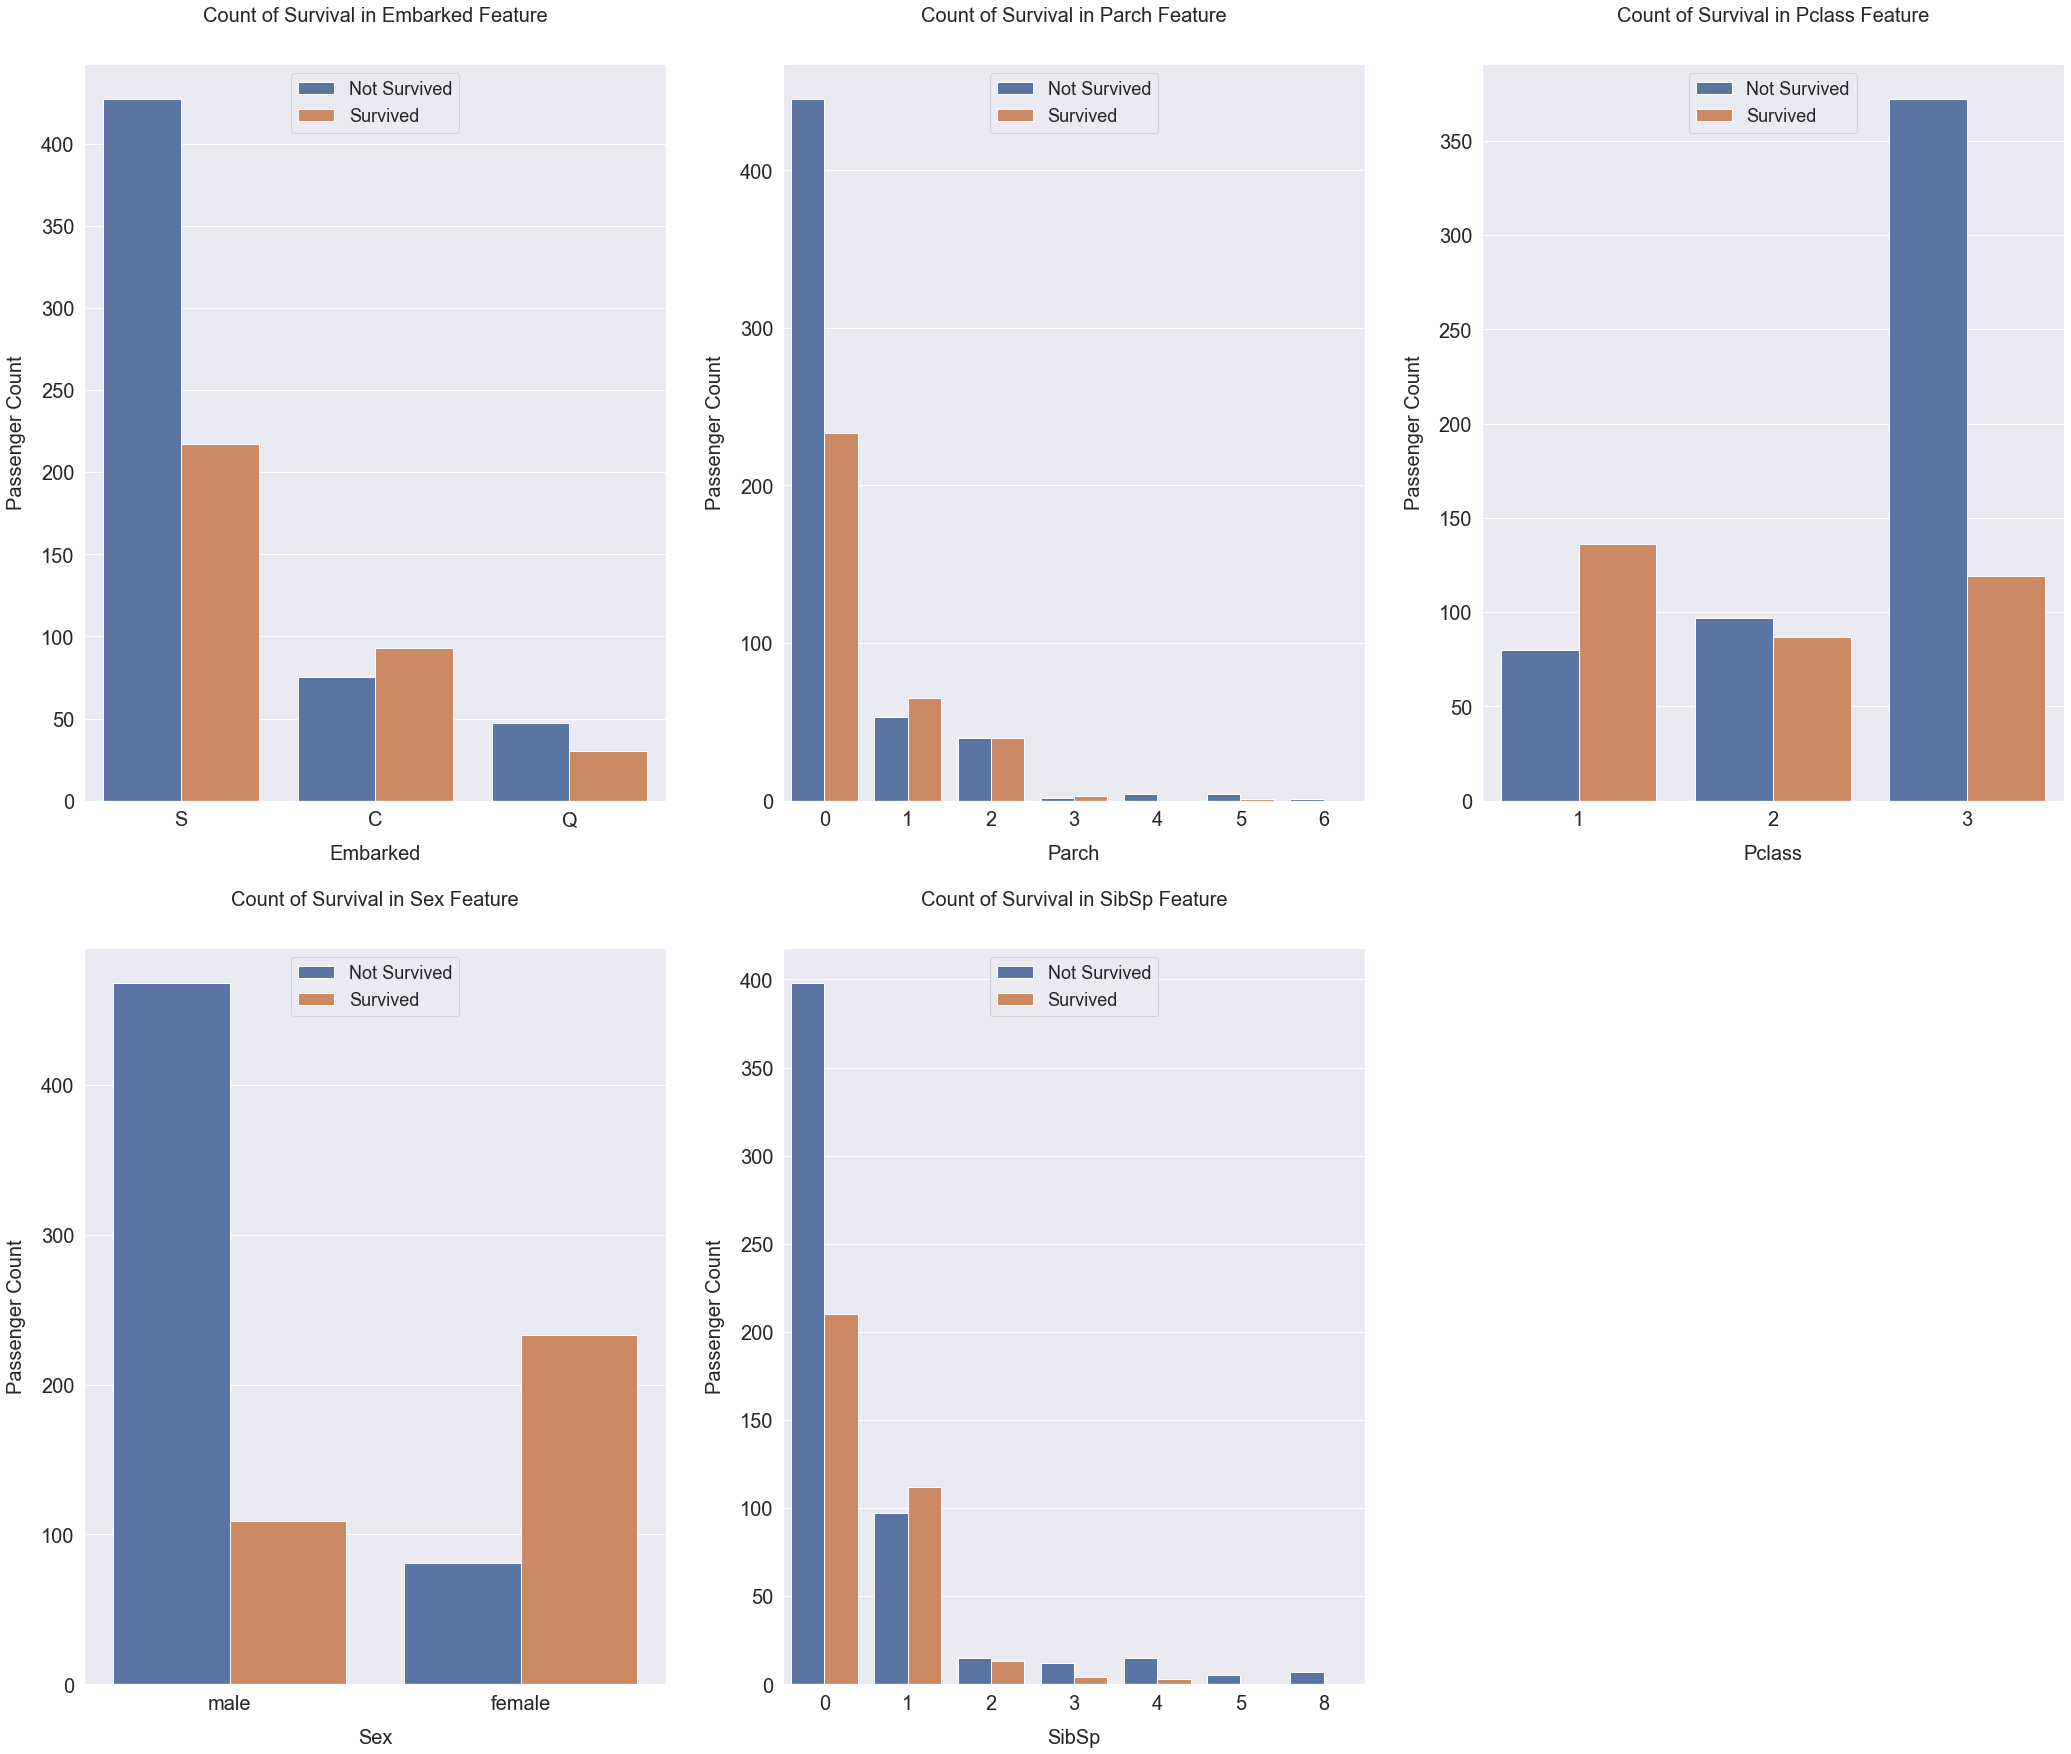

In [90]:
cat_features = ['Embarked', 'Parch', 'Pclass', 'Sex', 'SibSp']

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(20, 20))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(cat_features, 1):    
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, hue='Survived', data=df_train)
    
    plt.xlabel('{}'.format(feature), size=20, labelpad=15)
    plt.ylabel('Passenger Count', size=20, labelpad=15)    
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    
    plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size': 18})
    plt.title('Count of Survival in {} Feature'.format(feature), size=20, y=1.05)

plt.show()

Dari plot yang dihasikan kita dapat melihat, ternyata penumpang yang berangkat dari Cherbourg lebih banyak yang selamat, sedangkan penumpang dari Southampton, hanya setengahnya yang selamat. Untuk orang yang membawa hanya 1 Parent/Children, lebih banyak yang selamat. Untuk orang dengan Kelas Penumpang 1, kemungkinan selamatnya jauh lebih tinggi. Dan penumpang dengan Kelas Penumpang 3 hanya sedikit yang selamat. Dan Orang yang membawa 1 Sibling/Spouse kemungkinan selamatnya jauh lebih besar. Orang yang membawa 2 Sibling/Spouse kemungkinan selamatnya cukup kecil.

### Exploring data part 2

Ketikan perintah di bawah import

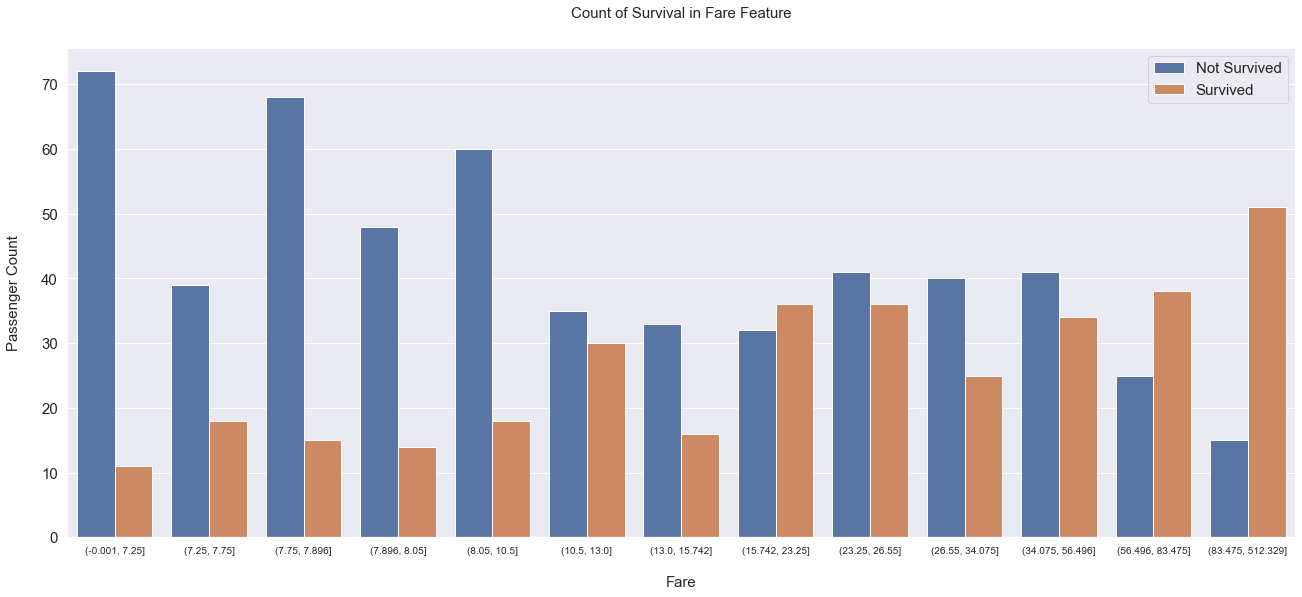

In [91]:
df_all['Fare'] = pd.qcut(df_all['Fare'], 13)

fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare', hue='Survived', data=df_all)

plt.xlabel('Fare', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Fare'), size=15, y=1.05)

plt.show()

Untuk Data Fare dan Age, kita akan membaginya ke dalam beberapa Bin/Group. Dari fungsi describe sebelumnya, kita tahu bahwa minimal usia yang ada adalah 0.17 tahun dan yang tertua adalah 80 tahun. Sehingga saya rasa membaginya dengan 13 kelompok quantile cukup. Dan untuk Fare termurah adalah 0 dan termahal adalah 512. Sehingga saya rasa membaginya dengan 10 kelompok quantile cukup. Perintah yang pertama bermaksud untuk membagi Fare menjadi 13 bagian dengan fungsi qcut(). Dan perintah yang kedua adalah untuk menggambarkan plot group usia terhadap tingkat keselamatan. Dapat dilihat bahwa semakin mahal harga tiketnya, semakin besar kemungkinan orang itu selamat, dimulai dari harga 56 ke atas. Tetapi banyak orang yang selamat dimulai dari 10.5 sudah cukup meningkat, kecuali kejadian yang terjadi pada kelompok pemegang tiket berharga 13-15.742.

## Feature Engineering

Melakukan Feature Engineering

### Feature Engineering - Part 1

Feature Engineering adalah tentang membuat fitur baru dari fitur yang sudah ada. Dari sini kita akan membuat beberapa fitur baru yang bertujuan menaikkan akurasi dari model machine learning kita. Fitur pertama yang kita buat adalah Family_Size, sesuai namanya ini adalah gabungan dari Parent, Children, Sibling, dan Spouse. Lalu kita tambahkan 1 dengan asumsi menghitung diri orang itu juga.

`f_all['Family_Size'] = df_all['SibSp'] + df_all['Parch'] + 1`

Untuk melihat nilai distinct dari Family_Size, anda dapat menjalankan perintah:

`df_all['Family_Size'].unique()`

Fitur kedua yang kita buat adalah menggabungkan Family_Size dengan groupnya masing-masing tergantung jumlahnya. Kategorinya adalah seperti berikut.

- Family Size 1 = Alone
- Family Size 2, 3 dan 4 = Small
- Family Size 5 dan 6 = Medium
- Family Size 7, 8 dan 11 = Large

`df_all['Family_Size_Grouped'] = df_all['Family_Size'].map(family_map)`

Setelah itu kita gambarkan plotnya.

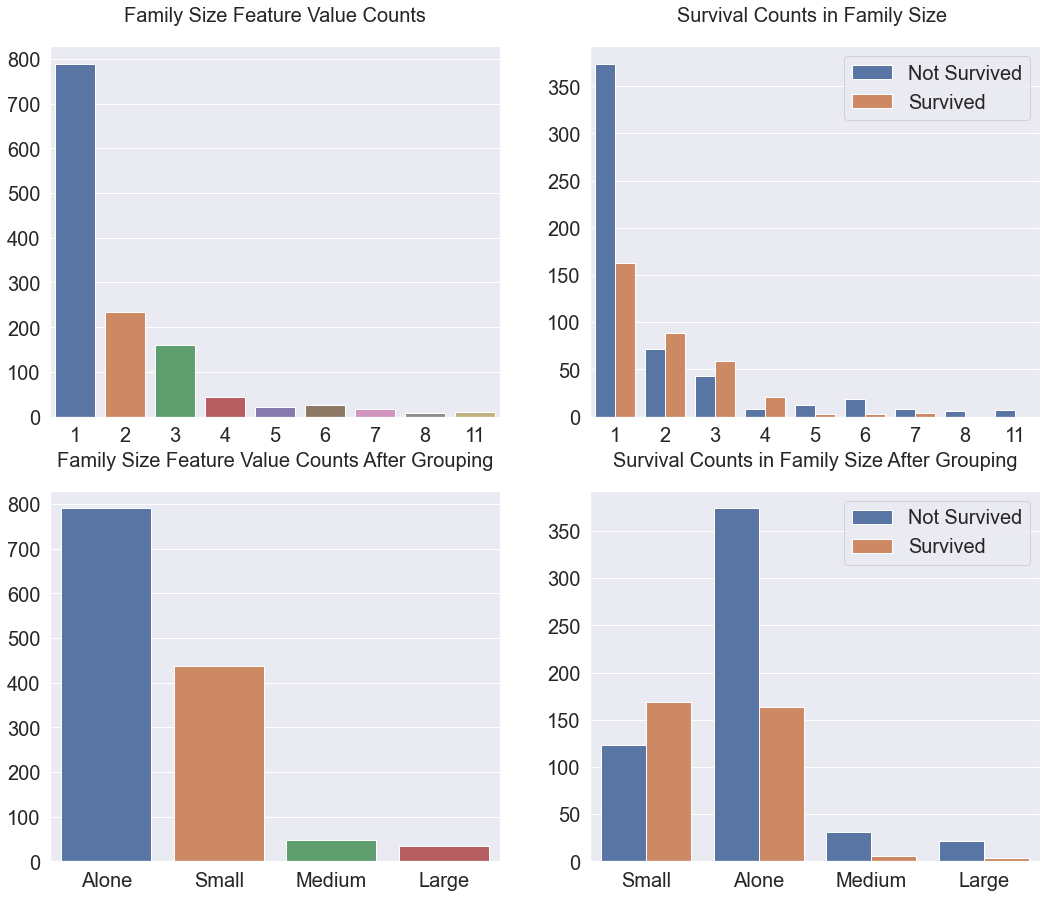

In [92]:
import matplotlib.pyplot as plt

df_all['Family_Size'] = df_all['SibSp'] + df_all['Parch'] + 1

fig, axs = plt.subplots(figsize=(10, 15), ncols=2, nrows=2)
plt.subplots_adjust(right=1.5)

sns.barplot(x=df_all['Family_Size'].value_counts().index, y=df_all['Family_Size'].value_counts().values, ax=axs[0][0])
sns.countplot(x='Family_Size', hue='Survived', data=df_all, ax=axs[0][1])

axs[0][0].set_title('Family Size Feature Value Counts', size=20, y=1.05)
axs[0][1].set_title('Survival Counts in Family Size ', size=20, y=1.05)

family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
df_all['Family_Size_Grouped'] = df_all['Family_Size'].map(family_map)

sns.barplot(x=df_all['Family_Size_Grouped'].value_counts().index, y=df_all['Family_Size_Grouped'].value_counts().values, ax=axs[1][0])
sns.countplot(x='Family_Size_Grouped', hue='Survived', data=df_all, ax=axs[1][1])

axs[1][0].set_title('Family Size Feature Value Counts After Grouping', size=20, y=1.05)
axs[1][1].set_title('Survival Counts in Family Size After Grouping', size=20, y=1.05)

for i in range(2):
    axs[i][1].legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 20})
    for j in range(2):
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
        axs[i][j].set_xlabel('')
        axs[i][j].set_ylabel('')

plt.show()

Pada plot menjelaskan bahwa orang dengan Family_Size 2,3,4 mempunyai kemungkinan selamat lebih besar, selebihnya kemungkinannya menurun dan orang yang pergi dengan Family_Size_Grouped Small lebih terlihat mempunyai tingkat keselamatan lebih besar.

### Feature Engineering - Part 2

Kita buat feature baru bernama Ticket_Frequency dengan nilai gabungan dari Ticket yang sama. Contoh sebelumnya akan bernilai 6, karena ada 6 ticket yang sama dalam data kita.

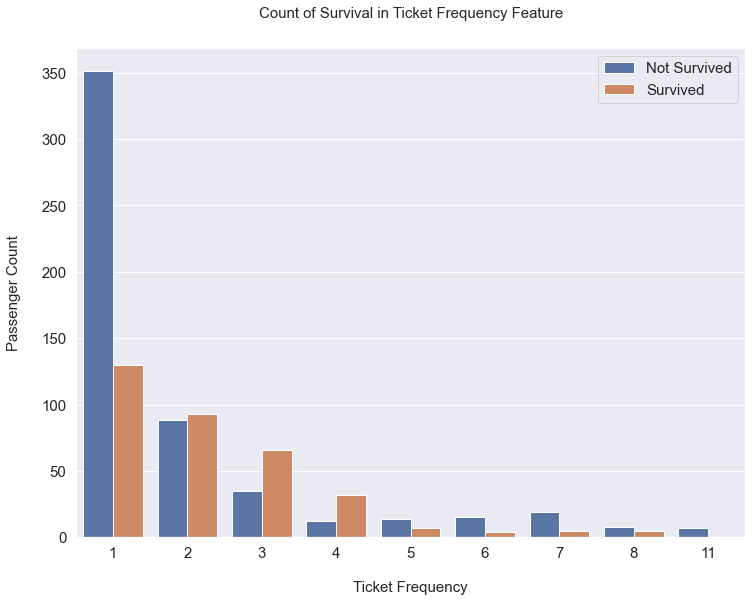

In [93]:
import matplotlib.pyplot as plt

df_all['Ticket_Frequency'] = df_all.groupby('Ticket')['Ticket'].transform('count')

fig, axs = plt.subplots(figsize=(12, 9))
sns.countplot(x='Ticket_Frequency', hue='Survived', data=df_all)

plt.xlabel('Ticket Frequency', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Ticket Frequency'), size=15, y=1.05)

plt.show()

Pada hasil plot penjelasannya feature Family_Size_Grouped, di angka 2,3,4 kemungkinan tingkat selamatnya meningkat. Kenapa feature ini berbeda dari Family_Size_Grouped? Karena bisa jadi ada pembantu, teman yang menggunakan tiket yang sama tetapi tidak terhitung sebagai keluarga.

### Feature Engineering - Part 3

![](Picts/feature3.png)

Jika anda lihat pada contoh di atas, dari nama orang yang ada di dataset ini, semuanya mempunyai pola yang sama, yaitu:

`[Nama_belakang], [Jabatan]. [Nama_depan]`

Sehingga kita bisa mengambil jabatannya saja dengan mengambil kata setelah "," (koma) dan sebelum "." (titik). Fungsi .split() akan membagi kalimat menjadi beberapa kata dengan keyword tertentu, dan dapat diambil dengan index [ ]

Gantilah bagian `[Braund, Mr. , Owen Harris]` dan lakukan split untuk bagian kedua yang akan menghasilkan `[Mr, Owen Harris]`
Lalu kita ambil index 0 alias yang pertama sehingga akan mendapatkan Mr

Dari sini kita bisa membuat fitur baru dengan nama ‘Title’ yang berisi jabatan seseorang. Jabatan yang paling umum di sini adalah Mr, Mrs. , dan Miss. Sehingga kita bisa mengetahui status menikah seseorang dari Mrs. Kita bisa membuat fitur baru lagi yaitu ‘Is_Married’ Fitur ini adalah jika seseorang mempunyai jabatan ‘Mrs’ , berarti dia sudah menikah. Lalu kita buat grafik plot nya.

Setelah melakukan `df_all[‘Title’].unique()`, ternyata ada banyak sekali jabatan lain, dan kita mengelompokkannya menjadi satu pada konten berikutnya.

- `['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona']` akan kita ubah menjadi 'Miss/Mrs/Ms'

- `['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev']` menjadi 'Dr/Military/Noble/Clergy'

In [94]:
df_all['Title'] = df_all['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

print(df_all['Title'].unique())

df_all['Is_Married'] = 0
df_all['Is_Married'].loc[df_all['Title'] == 'Mrs'] = 1

print(df_all['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer' 'Dona']
['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer' 'Dona']


### Feature Engineering - Part 4

Ketikan perintah di bawah ini:

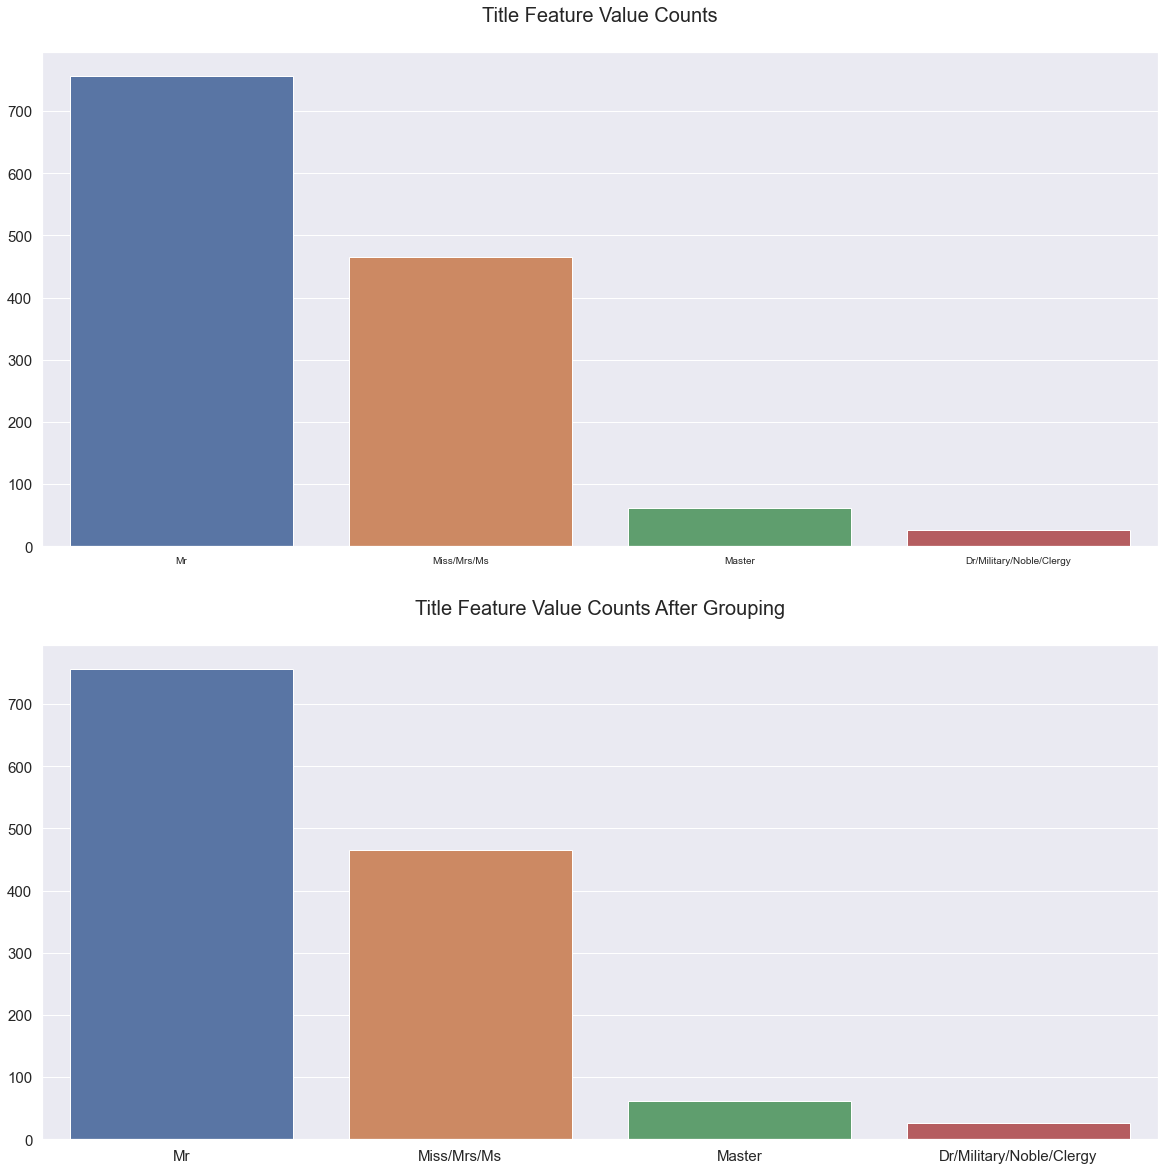

In [96]:
fig, axs = plt.subplots(nrows=2, figsize=(20, 20))
sns.barplot(x=df_all['Title'].value_counts().index, y=df_all['Title'].value_counts().values, ax=axs[0])

axs[0].tick_params(axis='x', labelsize=10)
axs[1].tick_params(axis='x', labelsize=15)

for i in range(2):    
    axs[i].tick_params(axis='y', labelsize=15)

axs[0].set_title('Title Feature Value Counts', size=20, y=1.05)

df_all['Title'] = df_all['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
df_all['Title'] = df_all['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

sns.barplot(x=df_all['Title'].value_counts().index, y=df_all['Title'].value_counts().values, ax=axs[1])
axs[1].set_title('Title Feature Value Counts After Grouping', size=20, y=1.05)

plt.show()

Bagian ini adalah bagian mengubah:
- `['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona']` akan kita ubah menjadi `'Miss/Mrs/Ms' 
- `['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev']` menjadi 'Dr/Military/Noble/Clergy'

In [97]:
df_all['Title'] = df_all['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
df_all['Title'] = df_all['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

### Final Check

Untuk melihat apa saja yang telah dilakukan dalam Feature Engineering, Anda dapat melihat dengan menggunakan head(). Pada bagian ini Anda keluarkan 5 baris awal pada dataframe all (df_all).

In [99]:
df_all.head(5)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Family_Size_Grouped,Ticket_Frequency,Title,Is_Married
0,22.0,NaN,S,"(-0.001, 7.25]","Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,2,Small,1,Mr,0
1,38.0,C85,C,"(56.496, 83.475]","Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,2,Small,2,Miss/Mrs/Ms,1
2,26.0,NaN,S,"(7.896, 8.05]","Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,1,Alone,1,Miss/Mrs/Ms,0
3,35.0,C123,S,"(34.075, 56.496]","Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,2,Small,2,Miss/Mrs/Ms,1
4,35.0,NaN,S,"(7.896, 8.05]","Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,1,Alone,1,Mr,0


## Hasil Contoh Modeling dari Feature Engineering

Pada Chapter ini hanya membahas hasil dari Feature Engineering yang telah dilakukan dengan membuat model.

### Modelling dengan hasil Feature Engineering - Part 1

Karena di sini saya tidak akan membahas detil tentang Modelling part, mohon terima saja semuanya terlebih dahulu. Yang kita inginkan adalah menaikkan akurasi dari model kita dengan Feature Engineering. Pertanyaan nya apakah benar kita bisa menaikkan akurasi modelnya?

Bagian ini akan menjawab hasilnya.

In [101]:
df_train = df_all.loc[:890]
df_test = df_all.loc[891:]
dfs = [df_train, df_test]

Perintah pertama bertujuan untuk membagi kembali dataset kita menjadi train dan test

In [102]:
non_numeric_features = ['Embarked', 'Sex', 'Title', 'Family_Size_Grouped', 'Age', 'Fare']

for df in dfs:
    for feature in non_numeric_features:        
        df[feature] = LabelEncoder().fit_transform(df[feature])

Perintah kedua adalah LabelEncoder untuk data” yang bersifat non-numeric, tujuannya adalah melakukan encoding [0-n] untuk data kategorikal. Contohnya Sex, akan dirubah menjadi 0 dan 1, laki-laki dan perempuan.

In [103]:
cat_features = ['Pclass', 'Sex', 'Embarked', 'Title', 'Family_Size_Grouped']
encoded_features = []

for df in dfs:
    for feature in cat_features:
        encoded_feat = OneHotEncoder().fit_transform(df[feature].values.reshape(-1, 1)).toarray()
        n = df[feature].nunique()
        cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
        encoded_df = pd.DataFrame(encoded_feat, columns=cols)
        encoded_df.index = df.index
        encoded_features.append(encoded_df)

df_train = pd.concat([df_train, *encoded_features[:5]], axis=1)
df_test = pd.concat([df_test, *encoded_features[5:]], axis=1)

Perintah ketiga bertujuan untuk mengubah feature kategori menjadi one hot, dengan OneHotEncoder. Akan menghasilkan beberapa kolom tergantung banyaknya kategori. Contohnya Pclass akan menjadi 3 kolom Pclass_1, Pclass_2, dan Pclass_3. Isinya adalah 0 dan 1 tergantung kategori orang tersebut

### Modelling dengan hasil Feature Engineering - Part 2

Kita akan melakukan drop terhadap kolom-kolom yang tidak kita perlukan, atau yang sudah kita encode sebelumnya

In [104]:
df_all = concat_df(df_train, df_test)
drop_cols = ['Cabin', 'Embarked', 'Survived', 'Name', 'PassengerId', 'Pclass', 'Sex', 'Ticket', 'Title']

df_all.drop(columns=drop_cols, inplace=True)

df_all.head()

,Age,Embarked_1,Embarked_2,Embarked_3,Family_Size,Family_Size_Grouped,Family_Size_Grouped_1,Family_Size_Grouped_2,Family_Size_Grouped_3,Family_Size_Grouped_4,...,Pclass_2,Pclass_3,Sex_1,Sex_2,SibSp,Ticket_Frequency,Title_1,Title_2,Title_3,Title_4
0,28,0.0,0.0,1.0,2,3,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1,1,0.0,0.0,0.0,1.0
1,52,1.0,0.0,0.0,2,3,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1,2,0.0,0.0,1.0,0.0
2,34,0.0,0.0,1.0,1,0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0,1,0.0,0.0,1.0,0.0
3,48,0.0,0.0,1.0,2,3,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1,2,0.0,0.0,1.0,0.0
4,48,0.0,0.0,1.0,1,0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0,1,0.0,0.0,0.0,1.0


### Modelling dengan hasil Feature Engineering - Part 3

Ketikkan perintah di bawah ini:

In [105]:
X_train = StandardScaler().fit_transform(df_train.drop(columns=drop_cols))
y_train = df_train['Survived'].values
X_test = StandardScaler().fit_transform(df_test.drop(columns=drop_cols))

print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))

X_train shape: (891, 24)
y_train shape: (891,)
X_test shape: (418, 24)


Setelah kita membagi train dan test untuk modelling seperti ini, kita akan melakukan modelling

### Modelling dengan hasil Feature Engineering - Part 4

Kita akan menggunakan RandomForestClassifier dari SkLearn dan menghitung akurasi menggunakan cross_val_score

In [107]:
random_forest = RandomForestClassifier(criterion='gini', 
                                           n_estimators=1100,
                                           max_depth=5,
                                           min_samples_split=4,
                                           min_samples_leaf=5,
                                           max_features='auto',
                                           oob_score=True,
                                           random_state=50)
random_forest.fit(X_train, y_train)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(random_forest, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.83333333 0.87640449 0.76404494 0.87640449 0.84269663 0.80898876
 0.82022472 0.78651685 0.86516854 0.85393258]
Mean: 0.8327715355805243
Standard Deviation: 0.03604127069930158


Hasil akurasinya dengan menggunakan feature dari feature engineering adalah sekitar 0.832 sesuai pada hasil di atas.

### Modelling tanpa hasil Feature Engineering - Part 1

Sekarang kita akan modelling lagi tanpa menyertakan fitur yang sudah kita buat.

In [109]:
df_all = concat_df(df_train, df_test)
drop_cols = ['Cabin', 'Embarked', 'Family_Size', 'Family_Size_Grouped', 'Survived',
             'Name', 'PassengerId', 'Pclass', 'Sex', 'Ticket', 'Title',
             'Family_Size_Grouped_1', 'Family_Size_Grouped_2', 'Family_Size_Grouped_3', 'Family_Size_Grouped_4',
             'Ticket_Frequency', 'Title_1', 'Title_2', 'Title_3', 'Title_4', 'Is_Married']

df_all.drop(columns=drop_cols, inplace=True)

df_all.head()
X_train = StandardScaler().fit_transform(df_train.drop(columns=drop_cols))
y_train = df_train['Survived'].values
X_test = StandardScaler().fit_transform(df_test.drop(columns=drop_cols))

print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))

X_train shape: (891, 12)
y_train shape: (891,)
X_test shape: (418, 12)


### Modelling tanpa hasil Feature Engineering - Part 2

Masukan perintah berikut.

In [110]:
random_forest = RandomForestClassifier(criterion='gini', 
                                           n_estimators=1100,
                                           max_depth=5,
                                           min_samples_split=4,
                                           min_samples_leaf=5,
                                           max_features='auto',
                                           oob_score=True,
                                           random_state=50)
random_forest.fit(X_train, y_train)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(random_forest, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.78888889 0.84269663 0.76404494 0.87640449 0.85393258 0.80898876
 0.79775281 0.7752809  0.86516854 0.80898876]
Mean: 0.818214731585518
Standard Deviation: 0.03700330937285851


Akurasi meningkat sekitar 0.2 , artinya fitur yang kita buat dapat menaikkan 2% akurasi model. Ini adalah salah satu kegunaan dari Feature Engineering.

**Note**: Akurasi ini tidak absolut dan dapat berubah, tergantung dari banyak factor, termasuk dari parameter yang dimasukkan. Fitur yang kita buat pun dapat menjadi buruk juga tergantung tipe model yang digunakan.

### Kesimpulan

Hasil perbandingan dari 2 model tersebut seperti di bawah ini:

![](Picts/conc.png)

**Konklusi**:

Feature Engineering mengharuskan kita membuat banyak ide fitur dari data yang sudah ada. Biasanya yang dapat kita lakukan adalah, penggabungan (grouping), ekstraksi fitur (seperti Title yang didapat dari nama orang), dan masih banyak lagi. Jangan malas untuk melakukan feature engineering dan mencoba segala sesuatu yang ada di pikiran kita. Barangkali ini dapat meningkatkan akurasi model kita.

## You Have Passed the Module

![](Picts/congratulations.png)